<a href="https://colab.research.google.com/github/rexosaur/CIS2300/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subject: Compare Real GDP of NYC by Industry to and and National Real Value Added by Industry.

1. Import Datasets using api. (Attempted)
*   Attain API
*   Explore API

2. Source Data

*  bea.gov: GDP in Chained dollars by Industry and County
*  zillow.com: typical home prices by Metro

3. Compile relevant data into dataframe using numpy.
*  Attempted to import csv file as is from Github.
*   Error due to parsing.
*   Manually inspected csv files and removed problematic cells.
* Github csv files fail to load.
* Attempt csv files from Google drive. Fail.
* Change privacy settings on github.
* Github csv files successfuly loads.

4. Manipulate dataframes


In [ ]:
#Class 19: webAPIs
#https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf
import json
import requests
from google.colab import userdata #use Google Colab 'secrets' module

api_key = userdata.get('BEA_APIkey')
url = 'https://apps.bea.gov/api/data'
params = {
    'UserID': api_key,
    'method': 'GetDataSetList',
    'ResultFormat': 'json'
}

response = requests.get(url, params=params)
print(response)

# Check if get request is= successful
if response.status_code == 200:
  data = response.json()
  print(type(data))
  print(json.dumps(data, indent=4))

else:
  print(f"Error:", {response.status_code})

In [ ]:
print (data['BEAAPI']['Results'].keys())
print (type(data['BEAAPI']['Results']))
print("\n----------\n")

for item in data['BEAAPI']['Results']['Dataset']:
  print(f"{item['DatasetName']}: {item['DatasetDescription']}")

In [ ]:
params["DatasetName"] = ["GDPbyIndustry"]
params['method'] = ['GetParameterList']
response = requests.get(url, params=params)
print(json.dumps((response.json()), indent= 4))

Note: I've attempted to use API to source data, but due to time constraints, I cannot explore further.

In [6]:
#Class 19: webAPIs

#map module
import folium

map_out = folium.Map(location=[lat, lon], zoom_start=15) #location

#marker
folium.Marker(
    location=[lat, lon],
    popup=name,
    icon=folium.Icon(icon = 'cloud', color='blue')
).add_to(map_out)

map_out

NameError: name 'lat' is not defined

In [49]:
#Chapter 14, Class 17: Numpy Pandas
import pandas as pd
import numpy as np

In [78]:
#Chapter 14, Class 17: Numpy Pandas (https://brightspace.cuny.edu/d2l/le/content/644280/viewContent/33137677/View)



#Google drive upload then source:
#from google.colab import drive
#drive.mount('/content/drive')
#gdp_url = "https://drive.google.com/file/d/1TGCxA_qZAniKbPkAKdzotI5EMhKyUsDc/view?usp=drive_link"
#homes_url = "https://drive.google.com/file/d/17ugAtWJM-QI6YoeV57Wzdw23ypZmkJCb/view?usp=drive_link"

#import gdown
#gdp_url = "https://drive.google.com/uc?id=1TGCxA_qZAniKbPkAKdzotI5EMhKyUsDc"
#gdown.download(gdp_url, output_gdp, quiet=False)
#homes_url = "https://drive.google.com/uc?id=17ugAtWJM-QI6YoeV57Wzdw23ypZmkJCb"
#gdown.download(homes_url, output_homes, quiet=False)
#df_homes = pd.read_csv(output_homes)
#df_gdp = pd.read_csv(output_gdp)

#Data source options
!curl "{gdp_url}" -o bea.csv
!curl "{homes_url}" -o zillow.csv

#github
gdp_url = "https://raw.githubusercontent.com/rexosaur/CIS2300/refs/heads/main/GDP%20in%20Chained%20dollars%20by%20Industry%20and%20County.csv"
homes_url = "https://raw.githubusercontent.com/rexosaur/CIS2300/refs/heads/main/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"

#create dataframes
gdp_df_raw = pd.read_csv("bea.csv")
homes_df_raw = pd.read_csv("zillow.csv")


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7955  100  7955    0     0  79082      0 --:--:-- --:--:-- --:--:-- 79550
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4852k  100 4852k    0     0  14.6M      0 --:--:-- --:--:-- --:--:-- 14.6M


In [79]:
homes_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'Date',
       'HomeValue'],
      dtype='object')

In [63]:
#Manipulate Zillow Data

homes_df = homes_df.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    var_name='Date',
    value_name='HomeValue'
)

# Convert 'Date' column to datetime
homes_df['Date'] = pd.to_datetime(homes_long['Date'])

# Preview
homes_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,HomeValue
0,102001,0,United States,country,NaN,1996-02-29,102753.910572
1,394913,1,"New York, NY",msa,NY,1996-02-29,180549.814910
2,753899,2,"Los Angeles, CA",msa,CA,1996-02-29,185628.075152
3,394463,3,"Chicago, IL",msa,IL,1996-02-29,131630.295166
4,394514,4,"Dallas, TX",msa,TX,1996-02-29,110553.470188


In [82]:
#Zillow Data
#Zero in on New York, NY
df_ny_homes = homes_df.loc[homes_df['RegionName'] == 'New York, NY']
df_ny_homes = df_ny_homes[df_ny_homes['Date']>='2022-01-01']
df_ny_homes = df_ny_homes[['Date', 'HomeValue']]
df_ny_homes = df_ny_homes.reset_index(drop=True)
df_ny_homes.head()

,Date,HomeValue
0,2022-01-31,591574.531859
1,2022-02-28,596075.530214
2,2022-03-31,603253.414557
3,2022-04-30,610347.634915
4,2022-05-31,620070.102796


In [89]:
#Manipulate BEA Data for GDP of New York, NY
gdp_df = gdp_df_raw.melt(
    id_vars=['GeoFips','LineCode','Description'],
    var_name='Date',
    value_name='GDP'
)

#Convert 'Year' column to datetime
gdp_df['Date'] = pd.to_datetime(gdp_df['Date'])
gdp_df['GDP'] = pd.to_numeric(df_ny_gdp['GDP'], errors='coerce')
gdp_df.head()

,GeoFips,LineCode,Description,Date,GDP
0,36061,1,All industry total,2001-01-01,509411971.0
1,36061,2,Private industries,2001-01-01,475436475.0
2,36061,3,"Agriculture, forestry, fishing and hunting",2001-01-01,NaN
3,36061,6,"Mining, quarrying, and oil and gas extraction",2001-01-01,10748.0
4,36061,10,Utilities,2001-01-01,910859.0


In [90]:
#Zero in on relevant BEA Data
df_ny_gdp = gdp_df[['Description', 'Date', 'GDP']]
df_ny_gdp.head()

,Description,Date,GDP
0,All industry total,2001-01-01,509411971.0
1,Private industries,2001-01-01,475436475.0
2,"Agriculture, forestry, fishing and hunting",2001-01-01,NaN
3,"Mining, quarrying, and oil and gas extraction",2001-01-01,10748.0
4,Utilities,2001-01-01,910859.0


In [126]:
#compare data
df_ny_homes.head()

,Date,HomeValue,Year
0,2022-01-31,591574.531859,2022
1,2022-02-28,596075.530214,2022
2,2022-03-31,603253.414557,2022
3,2022-04-30,610347.634915,2022
4,2022-05-31,620070.102796,2022


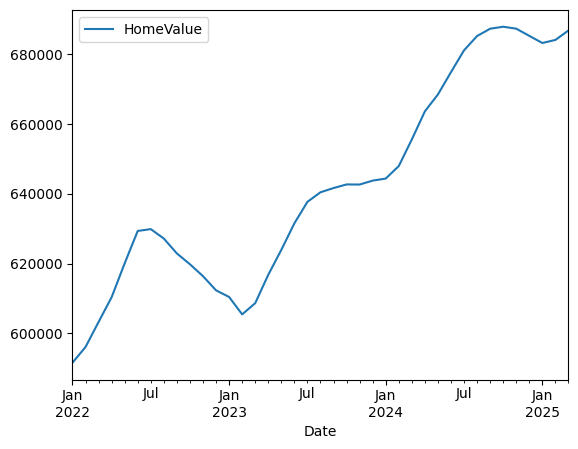

In [113]:
#plot data for home prices
import matplotlib.pyplot as plt
df_ny_homes.plot(x='Date', y='HomeValue', kind='line')
plt.show()

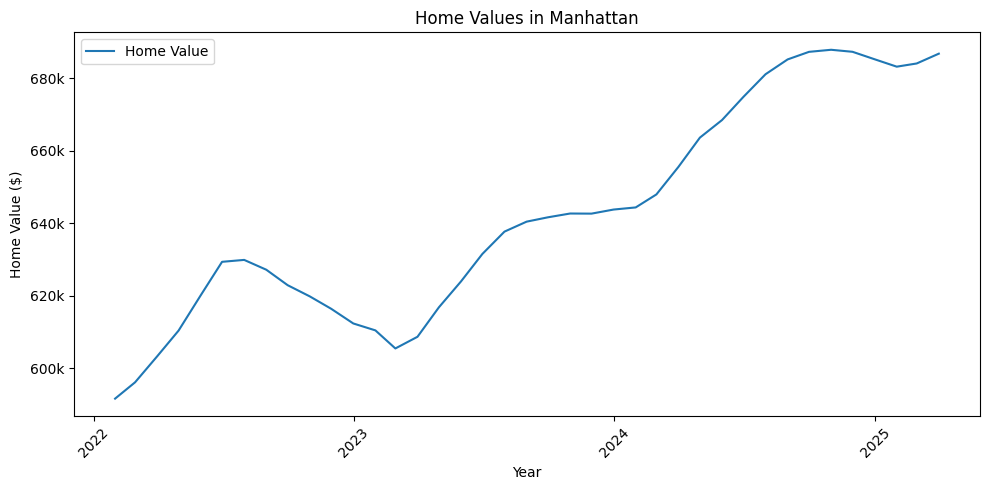

In [118]:
#format home prices chart
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

# Create a figure and axis explicitly
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the line manually
ax.plot(df_ny_homes['Date'], df_ny_homes['HomeValue'], label='Home Value')

# Format Y-axis as "k"
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

# Format X-axis to show years only
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate X ticks and clean layout
plt.xticks(rotation=45)
plt.title('Home Values in Manhattan')
plt.xlabel('Year')
plt.ylabel('Home Value ($)')
plt.legend()
plt.tight_layout()
plt.show()

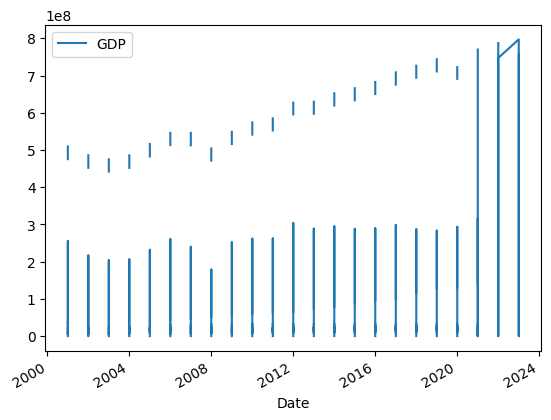

In [115]:
#plot data for New York's GDP
#Failed attempt
df_ny_gdp.plot(x='Date', y='GDP', kind='line')
plt.show()

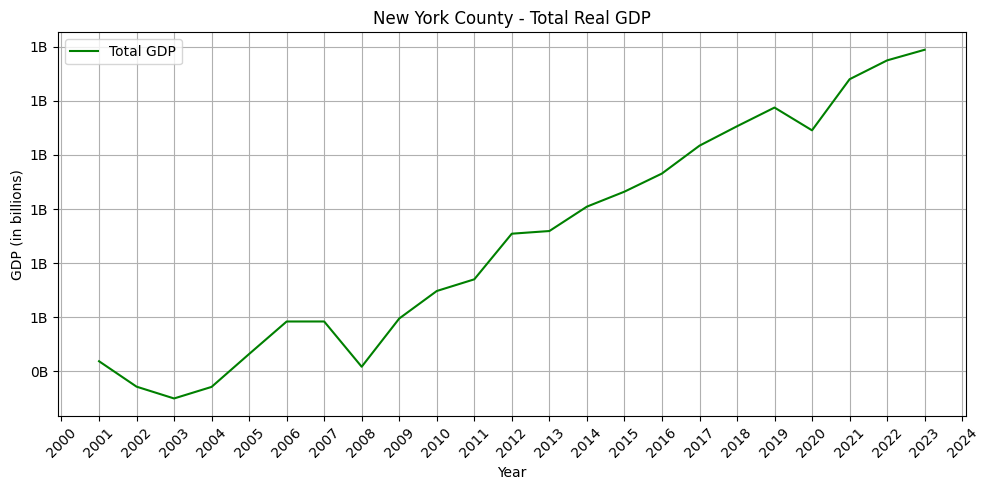

In [116]:
#Format in the most easily understandable way. Short on time.
df_total_gdp = df_ny_gdp[df_ny_gdp['Description'] == 'All industry total']
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_total_gdp['Date'], df_total_gdp['GDP'], label='Total GDP', color='green')

# Format Y-axis in billions
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.0f}B'))

# Format X-axis with years only
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('New York County - Total Real GDP')
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

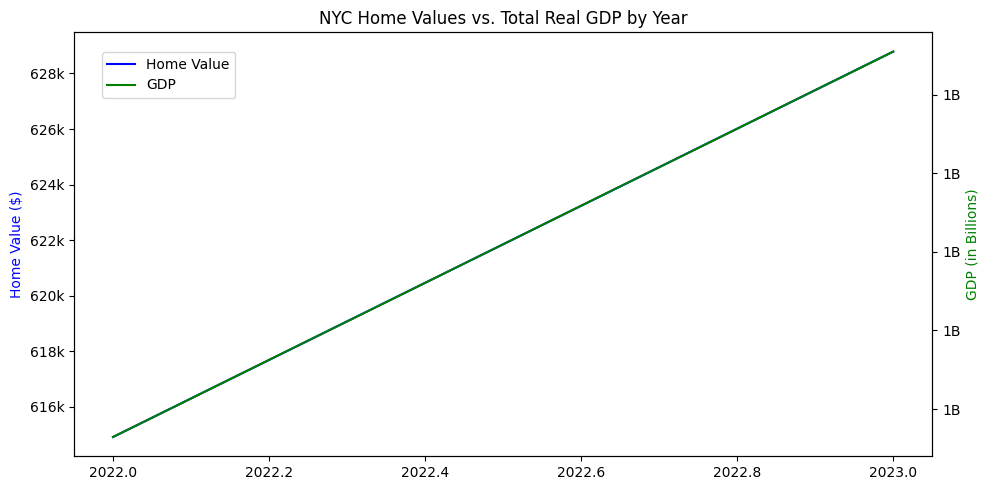

In [119]:
#failed attempt to plot both data to one chart

# Convert to Year column
df_ny_homes['Year'] = df_ny_homes['Date'].dt.year
df_total_gdp['Date'] = pd.to_datetime(df_total_gdp['Date'], errors='coerce')
df_total_gdp['Year'] = df_total_gdp['Date'].dt.year

# Remove non-numeric GDP and drop NaNs
df_total_gdp['GDP'] = pd.to_numeric(df_total_gdp['GDP'], errors='coerce')
df_total_gdp = df_total_gdp.dropna(subset=['GDP'])

# Aggregate to annual average
df_home_annual = df_ny_homes.groupby('Year')['HomeValue'].mean().reset_index()
df_gdp_annual = df_total_gdp.groupby('Year')['GDP'].sum().reset_index()

# Merge by year
df_combined = pd.merge(df_home_annual, df_gdp_annual, on='Year', how='inner')

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Home Value on left Y-axis
ax1.plot(df_combined['Year'], df_combined['HomeValue'], color='blue', label='Home Value')
ax1.set_ylabel('Home Value ($)', color='blue')
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

# GDP on right Y-axis
ax2 = ax1.twinx()
ax2.plot(df_combined['Year'], df_combined['GDP'], color='green', label='GDP')
ax2.set_ylabel('GDP (in Billions)', color='green')
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.0f}B'))

plt.title('NYC Home Values vs. Total Real GDP by Year')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()

In [124]:
df_ny_homes.head()

,Date,HomeValue,Year
0,2022-01-31,591574.531859,2022
1,2022-02-28,596075.530214,2022
2,2022-03-31,603253.414557,2022
3,2022-04-30,610347.634915,2022
4,2022-05-31,620070.102796,2022


In [125]:
df_ny_gdp.head()

,Description,Date,GDP
0,All industry total,2001-01-01,509411971.0
1,Private industries,2001-01-01,475436475.0
2,"Agriculture, forestry, fishing and hunting",2001-01-01,NaN
3,"Mining, quarrying, and oil and gas extraction",2001-01-01,10748.0
4,Utilities,2001-01-01,910859.0


In [133]:
#make data frames compatible
df_homes_compatible = df_ny_homes[['Date','HomeValue']]
df_gdp_industry = df_ny_gdp[['Description','Date', 'GDP']]